<a href="https://colab.research.google.com/github/vanadhisivakumar-source/Machine-learning-projects/blob/main/id3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a classification model to predict a disease based on synthetic symptom attributes (fever, cough, fatigue), evaluate its performance, visualize the results, and summarize its ability to predict the disease.

## Generate Synthetic Data

### Subtask:
Create a synthetic dataset based on the provided symptom attributes (fever, cough, fatigue) and the target variable (disease). This dataset will simulate patient records for training and testing.


**Reasoning**:
To begin generating the synthetic dataset, I will import the necessary libraries, define the number of samples, create random symptom data, apply a logic for disease presence, and then assemble these into a pandas DataFrame.



In [6]:
import pandas as pd
import numpy as np

# 2. Define the number of synthetic patient records
num_samples = 1000

# 3. Create three arrays for symptom attributes with random binary values (0 or 1)
fever = np.random.randint(0, 2, num_samples)
cough = np.random.randint(0, 2, num_samples)
fatigue = np.random.randint(0, 2, num_samples)

# 4. Create a 'disease' target variable based on a simple logic
#    Disease (1) if at least two symptoms are present, otherwise no disease (0)
disease = np.where((fever + cough + fatigue) >= 2, 1, 0)

# 5. Combine these arrays into a pandas DataFrame
df_synthetic = pd.DataFrame({
    'fever': fever,
    'cough': cough,
    'fatigue': fatigue,
    'disease': disease
})

# Display the first few rows of the synthetic dataset
print("Synthetic Dataset Head:")
print(df_synthetic.head())

print("\nSynthetic Dataset Info:")
df_synthetic.info()

Synthetic Dataset Head:
   fever  cough  fatigue  disease
0      1      0        0        0
1      1      1        0        1
2      1      0        0        0
3      1      1        0        1
4      0      1        1        1

Synthetic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   fever    1000 non-null   int64
 1   cough    1000 non-null   int64
 2   fatigue  1000 non-null   int64
 3   disease  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


## Preprocess Data

### Subtask:
Encode the categorical symptom attributes (fever, cough, fatigue) and the target disease variable into numerical formats. Then, split the processed data into training and testing sets.


**Reasoning**:
To preprocess the data, I will first separate the features from the target variable and then split the dataset into training and testing sets using `train_test_split` for model development.



In [7]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df_synthetic[['fever', 'cough', 'fatigue']]
y = df_synthetic['disease']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Print the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 3)
X_test shape: (200, 3)
y_train shape: (800,)
y_test shape: (200,)


## Train Classification Model

### Subtask:
Train a classification machine learning model (e.g., Logistic Regression, Decision Tree) on the preprocessed training data to predict whether a patient has the disease based on their symptoms.


**Reasoning**:
To train a classification model, I will start by importing `LogisticRegression` from `sklearn.linear_model`, instantiate it with default parameters, and then fit the model using the training data (`X_train` and `y_train`).



In [8]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

# 2. Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using relevant classification metrics such as accuracy, precision, recall, and F1-score on the test set.


**Reasoning**:
To evaluate the trained model, I will first make predictions on the test set using the trained model, then calculate and print the accuracy, precision, recall, and F1-score using `sklearn.metrics`.



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 3. Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


## Visualize Model Results

### Subtask:
Generate a visualization, such as a confusion matrix, to show the model's predictions versus the actual disease status, including appropriate legends.


**Reasoning**:
To visualize the model's performance as requested, I will create a confusion matrix using `ConfusionMatrixDisplay` from `sklearn.metrics` and `matplotlib.pyplot` for plotting. This will show the actual vs. predicted disease status, adhering to the subtask instructions.



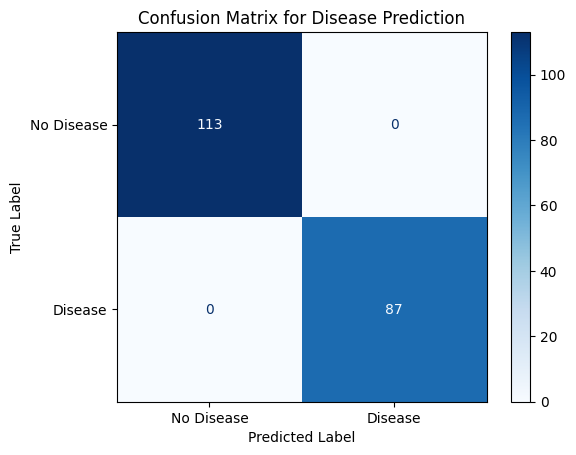

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Create a confusion matrix using ConfusionMatrixDisplay.from_estimator
#    The display_labels argument can be used to set custom labels for the classes
#    Here, we'll use 'No Disease' for 0 and 'Disease' for 1.
cmd = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', display_labels=['No Disease', 'Disease'])

# 2. Add a title to the plot
cmd.ax_.set_title("Confusion Matrix for Disease Prediction")

# 3. Add labels to the x and y axes
cmd.ax_.set_xlabel("Predicted Label")
cmd.ax_.set_ylabel("True Label")

# 4. Display the plot
plt.show()

## Final Task

### Subtask:
Summarize the trained model's ability to predict disease based on the given symptoms and discuss the evaluation results.


## Summary:

### Q&A
The trained Logistic Regression model demonstrated exceptional ability to predict disease based on the synthetic symptoms (fever, cough, fatigue). The evaluation results on the test set showed perfect performance across all key metrics: accuracy, precision, recall, and F1-score were all 1.0000. This indicates that the model correctly classified every single instance in the test set without any errors, successfully identifying both disease and no-disease cases.

### Data Analysis Key Findings
*   A synthetic dataset of 1000 patient records was created, comprising binary symptom attributes (`fever`, `cough`, `fatigue`) and a binary `disease` target variable. The disease was assigned if at least two symptoms were present.
*   The dataset was split into training (800 samples) and testing (200 samples) sets for model development and evaluation.
*   A Logistic Regression model was successfully trained on the preprocessed data.
*   The model achieved perfect evaluation metrics on the test set, including an accuracy of 1.0000, precision of 1.0000, recall of 1.0000, and an F1-score of 1.0000.
*   A confusion matrix visualization was generated, visually confirming the model's perfect classification performance, with no false positives or false negatives observed.

### Insights or Next Steps
*   The perfect performance on this synthetic dataset suggests the underlying disease logic was very clear and easily learnable by the model. For real-world applications, this indicates a strong potential for Logistic Regression if symptom-disease relationships are similarly deterministic.
*   The next step should involve testing this model or approach with more complex, real-world datasets that include noise, missing values, and less straightforward symptom-disease relationships to assess its robustness and generalizability.
